In [ ]:
!pip install -q lucid>=0.2.3

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1000,1000
create_opengl_context((WIDTH, HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

ModuleNotFoundError: ignored

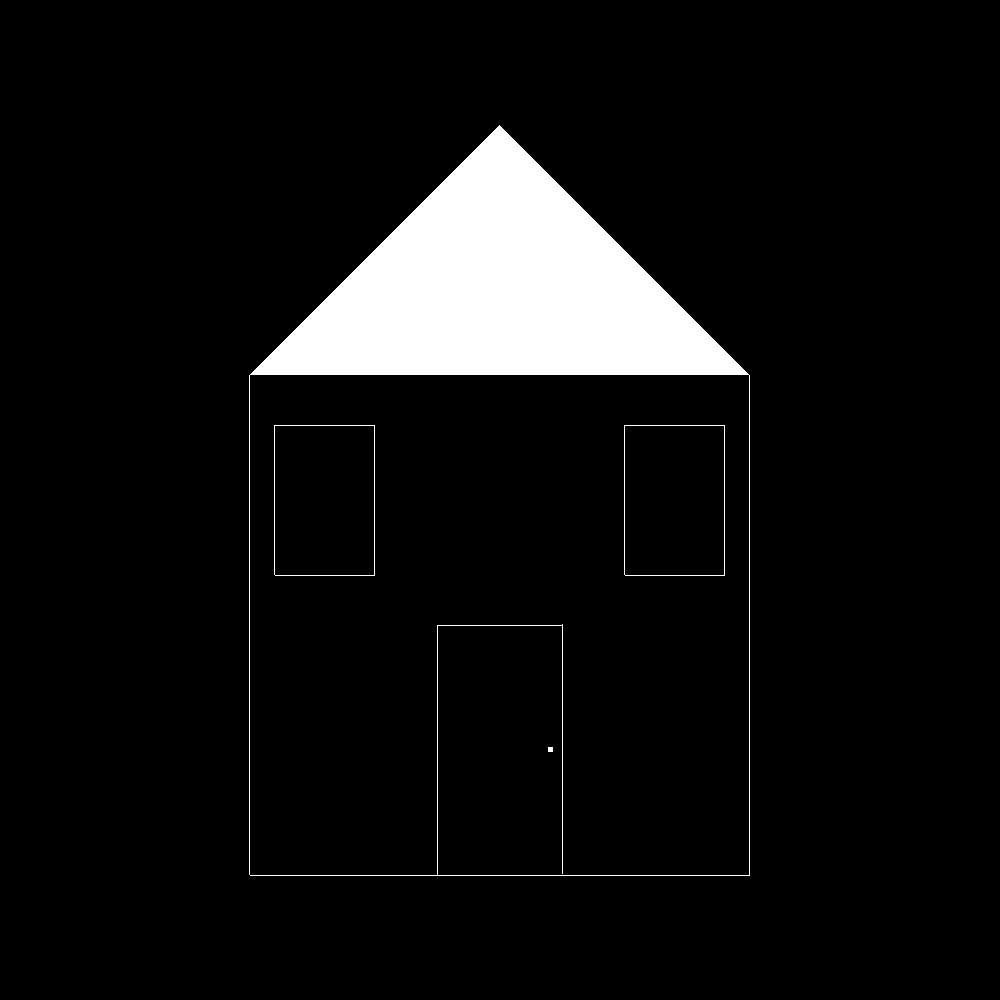

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(1,1,1)
gl.glPointSize(5)

#Roof

gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0,.75)
gl.glVertex2f(-.5,.25)
gl.glVertex2f(.5,.25)
gl.glEnd()

#Body

gl.glBegin(gl.GL_LINES)
gl.glVertex2f(-.5,.25)
gl.glVertex2f(-.5,-.75)
gl.glVertex2f(-.5,-.75)
gl.glVertex2f(.5,-.75)
gl.glVertex2f(.5,.25)
gl.glVertex2f(.5,-.75)
gl.glVertex2f(.5,.25)
gl.glEnd()

#Door

gl.glBegin(gl.GL_LINES)
gl.glVertex2f(-.125,-.75)
gl.glVertex2f(-.125,-.25)
gl.glVertex2f(.125,-.25)
gl.glVertex2f(.125,-.75)
gl.glVertex2f(-.125,-.25)
gl.glVertex2f(.125,-.25)
gl.glEnd()

#Knob

gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(.100,-.5)
gl.glEnd()

# Window

gl.glBegin(gl.GL_LINES)
gl.glVertex2f(-.45,-.15)
gl.glVertex2f(-.45,.15)
gl.glVertex2f(-.25,.15)
gl.glVertex2f(-.45,.15)
gl.glVertex2f(-.25,-.15)
gl.glVertex2f(-.25,.15)
gl.glVertex2f(-.45,-.15)
gl.glVertex2f(-.25,-.15)

gl.glVertex2f(.45,-.15)
gl.glVertex2f(.45,.15)
gl.glVertex2f(.25,.15)
gl.glVertex2f(.45,.15)
gl.glVertex2f(.25,-.15)
gl.glVertex2f(.25,.15)
gl.glVertex2f(.45,-.15)
gl.glVertex2f(.25,-.15)

gl.glEnd()

from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

Sabir: sun, moon, sky
Tasfia: scenery
Faiyaz: shadow/

Enter Day or Night:Day


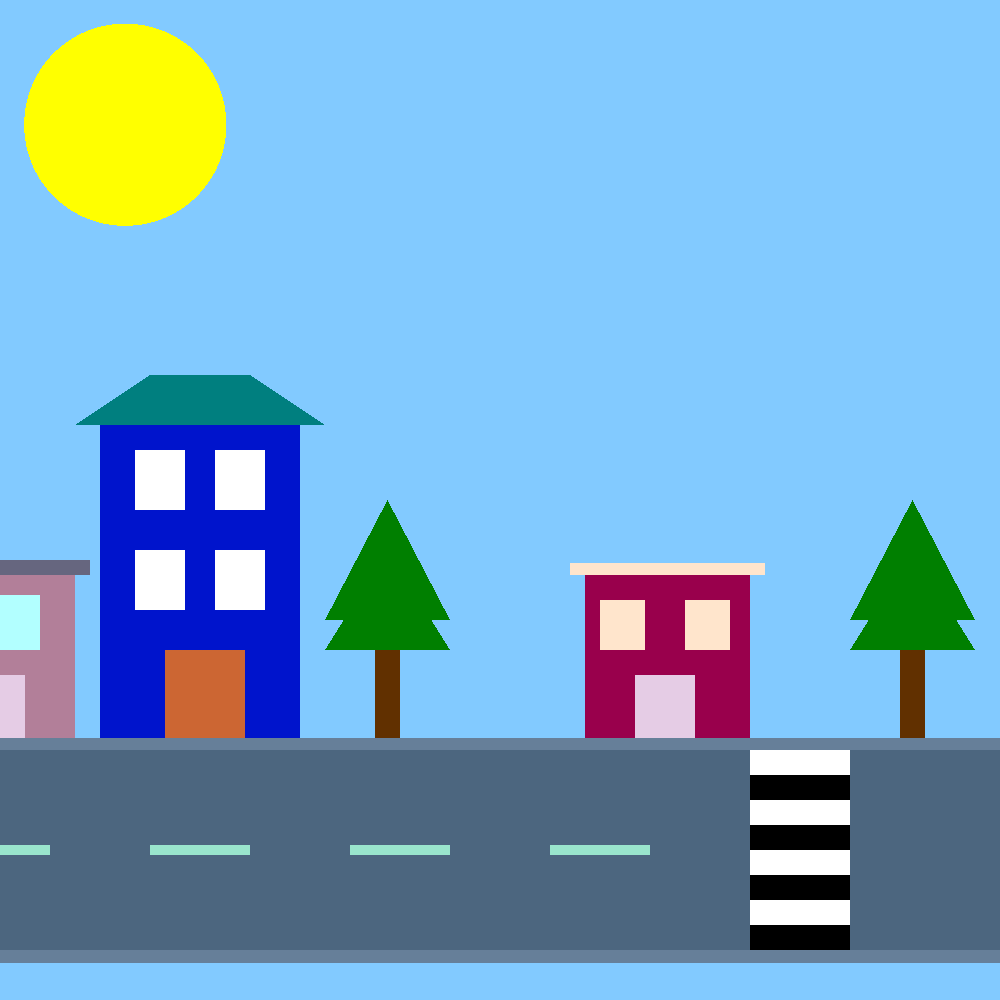

In [ ]:
import math
import random


def WritePixel(x, y, temp_x, temp_y):
    gl.glPointSize(2)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x + temp_x, y + temp_y)
    gl.glEnd()


def MidpointCircle(x, y, radius):
    d = 0.001 - radius
    temp_x = 0
    temp_y = radius
    Circlepoints(x, y, temp_x, temp_y)
    while (temp_x < temp_y):
        if d < 0:
            # E
            d = d + (2 * temp_x) + .003
            temp_x += .001
        else:
            # SE
            d = d + (2 * temp_x) - (2 * temp_y) + .005
            temp_x += .001
            temp_y -= .001
        Circlepoints(x, y, temp_x, temp_y)




def Circlepoints(x, y, temp_x, temp_y):
    WritePixel(x, y, temp_x, temp_y)
    WritePixel(x, y, temp_y, temp_x)
    WritePixel(x, y, temp_y, -temp_x)
    WritePixel(x, y, temp_x, -temp_y)
    WritePixel(x, y, -temp_x, -temp_y)
    WritePixel(x, y, -temp_y, -temp_x)
    WritePixel(x, y, -temp_y, temp_x)
    WritePixel(x, y, -temp_x, temp_y)


def road():
    gl.glColor3f(.3,.4,.5)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.5)
    gl.glVertex2f(1,-0.9)
    gl.glVertex2f(-1,-0.9)
    gl.glVertex2f(-1,-0.5)
    gl.glEnd()

    gl.glColor3f(.4,.5,.6)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.475)
    gl.glVertex2f(1,-0.5)
    gl.glVertex2f(-1,-0.5)
    gl.glVertex2f(-1,-0.475)
    gl.glEnd()

    gl.glColor3f(.4,.5,.6)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.9)
    gl.glVertex2f(1,-0.925)
    gl.glVertex2f(-1,-0.925)
    gl.glVertex2f(-1,-0.9)
    gl.glEnd()

a=0.7
b=-0.5
c=-0.55
d=0.5
def road_det(a,b,c,d):

    for i in range(8):
      if (i%2==0):
        gl.glColor3f(1,1,1)
      else:
        gl.glColor3f(0,0,0)

      gl.glBegin(gl.GL_QUADS)
      gl.glVertex2f(a,b)
      gl.glVertex2f(a,c)
      gl.glVertex2f(d,c)
      gl.glVertex2f(d,b)
      gl.glEnd()
      b-=0.05
      c-=0.05

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(0.1,-0.69)
    gl.glVertex2f(0.1,-0.71)
    gl.glVertex2f(0.3,-0.71)
    gl.glVertex2f(0.3,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.1,-0.69)
    gl.glVertex2f(-0.1,-0.71)
    gl.glVertex2f(-0.3,-0.71)
    gl.glVertex2f(-0.3,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.5,-0.69)
    gl.glVertex2f(-0.5,-0.71)
    gl.glVertex2f(-0.7,-0.71)
    gl.glVertex2f(-0.7,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.9,-0.69)
    gl.glVertex2f(-0.9,-0.71)
    gl.glVertex2f(-1.1,-0.71)
    gl.glVertex2f(-1.1,-0.69)
    gl.glEnd()


# Input= Day OR Night

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
time=input('Enter Day or Night:')

# Day

if time == 'Day':
  # Day Background
  gl.glColor3f(0.50980392156862745098039215686275, 0.7921568627450980392156862745098, 1)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Day Sun
  gl.glColor3f(1, 1, 0)
  temp=0.2
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(-0.75, 0.75, temp)
      temp-=0.001
  road()
  road_det(a,b,c,d)
# Night

elif time == 'Night':
  # Night Background
  gl.glColor3f(0.0, 0.0, 0.0)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Night Star
  for i in range(500):
    gl.glColor3f(1, 1, 1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(random.uniform(-1.0,1.0),random.uniform(-1.0,1.0) )
    gl.glEnd()
  # Night Moon
  gl.glColor3f(0.7608, 0.7882, 0.7922)
  temp=0.1
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(0.75, 0.75, temp)
      temp-=0.001
  road()
  road_det(a,b,c,d)



#building 1

gl.glColor3f(0,0.08,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.8,0.15)
gl.glVertex2f(-0.4,0.15)
gl.glVertex2f(-0.4,-0.475)
gl.glVertex2f(-0.8,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0.5)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.7,0.25)
gl.glVertex2f(-0.5,0.25)
gl.glVertex2f(-0.35,0.15)
gl.glVertex2f(-0.85,0.15)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.73,0.1)
gl.glVertex2f(-0.63,0.1)
gl.glVertex2f(-0.63,-0.02)
gl.glVertex2f(-0.73,-0.02)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.57,0.1)
gl.glVertex2f(-0.47,0.1)
gl.glVertex2f(-0.47,-0.02)
gl.glVertex2f(-0.57,-0.02)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.73,-0.1)
gl.glVertex2f(-0.63,-0.1)
gl.glVertex2f(-0.63,-0.22)
gl.glVertex2f(-0.73,-0.22)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.57,-0.1)
gl.glVertex2f(-0.47,-0.1)
gl.glVertex2f(-0.47,-0.22)
gl.glVertex2f(-0.57,-0.22)
gl.glEnd()

gl.glColor3f(0.8,0.4,0.2)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.67,-0.3)
gl.glVertex2f(-0.51,-0.3)
gl.glVertex2f(-0.51,-0.475)
gl.glVertex2f(-0.67,-0.475)
gl.glEnd()


#Tree

gl.glColor3f(0.38,0.19,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.25,-0.3)
gl.glVertex2f(-0.2,-0.3)
gl.glVertex2f(-0.2,-0.475)
gl.glVertex2f(-0.25,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(-0.225,-0.1)
gl.glVertex2f(-0.1,-0.3)
gl.glVertex2f(-0.35,-0.3)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(-0.225,0)
gl.glVertex2f(-0.1,-0.24)
gl.glVertex2f(-0.35,-0.24)
gl.glEnd()


# building 2

gl.glColor3f(0.7,0.5,0.6)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.15)
gl.glVertex2f(-0.85,-0.15)
gl.glVertex2f(-0.85,-0.475)
gl.glVertex2f(-1,-0.475)
gl.glEnd()

gl.glColor3f(0.4,0.4,0.5)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.12)
gl.glVertex2f(-0.82,-0.12)
gl.glVertex2f(-0.82,-0.15)
gl.glVertex2f(-1,-0.15)
gl.glEnd()

gl.glColor3f(0.7,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.19)
gl.glVertex2f(-0.92,-0.19)
gl.glVertex2f(-0.92,-0.3)
gl.glVertex2f(-1,-0.3)
gl.glEnd()

gl.glColor3f(0.9,0.8,0.9)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.35)
gl.glVertex2f(-0.95,-0.35)
gl.glVertex2f(-0.95,-0.475)
gl.glVertex2f(-1,-0.475)
gl.glEnd()


#building 3

gl.glColor3f(0.6,0,0.3)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.17,-0.15)
gl.glVertex2f(0.5,-0.15)
gl.glVertex2f(0.5,-0.475)
gl.glVertex2f(0.17,-0.475)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.14,-0.125)
gl.glVertex2f(0.53,-0.125)
gl.glVertex2f(0.53,-0.15)
gl.glVertex2f(0.14,-0.15)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.2,-0.2)
gl.glVertex2f(0.29,-0.2)
gl.glVertex2f(0.29,-0.3)
gl.glVertex2f(0.2,-0.3)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.37,-0.2)
gl.glVertex2f(0.46,-0.2)
gl.glVertex2f(0.46,-0.3)
gl.glVertex2f(0.37,-0.3)
gl.glEnd()

gl.glColor3f(0.9,0.8,0.9)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.27,-0.35)
gl.glVertex2f(0.39,-0.35)
gl.glVertex2f(0.39,-0.475)
gl.glVertex2f(0.27,-0.475)
gl.glEnd()


#Tree 2

gl.glColor3f(0.38,0.19,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.8,-0.3)
gl.glVertex2f(0.85,-0.3)
gl.glVertex2f(0.85,-0.475)
gl.glVertex2f(0.8,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0.825,-0.1)
gl.glVertex2f(0.95,-0.3)
gl.glVertex2f(0.7,-0.3)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0.825,0)
gl.glVertex2f(0.95,-0.24)
gl.glVertex2f(0.7,-0.24)
gl.glEnd()



from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

Enter Hour:2


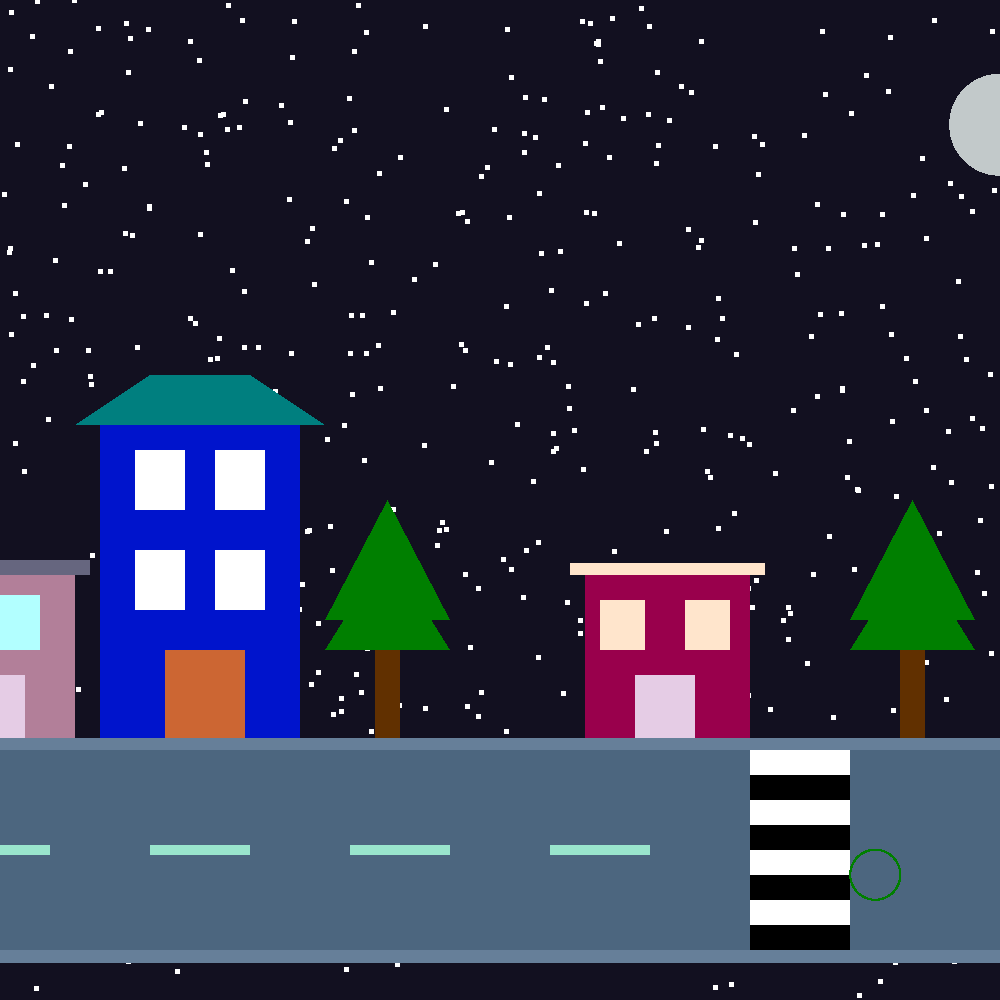

In [ ]:
import math
import random


def WritePixel(x, y, temp_x, temp_y):
    gl.glPointSize(2)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x + temp_x, y + temp_y)
    gl.glEnd()


def MidpointCircle(x, y, radius):
    d = 0.001 - radius
    temp_x = 0
    temp_y = radius
    Circlepoints(x, y, temp_x, temp_y)
    while (temp_x < temp_y):
        if d < 0:
            # E
            d = d + (2 * temp_x) + .003
            temp_x += .001
        else:
            # SE
            d = d + (2 * temp_x) - (2 * temp_y) + .005
            temp_x += .001
            temp_y -= .001
        Circlepoints(x, y, temp_x, temp_y)




def Circlepoints(x, y, temp_x, temp_y):
    WritePixel(x, y, temp_x, temp_y)
    WritePixel(x, y, temp_y, temp_x)
    WritePixel(x, y, temp_y, -temp_x)
    WritePixel(x, y, temp_x, -temp_y)
    WritePixel(x, y, -temp_x, -temp_y)
    WritePixel(x, y, -temp_y, -temp_x)
    WritePixel(x, y, -temp_y, temp_x)
    WritePixel(x, y, -temp_x, temp_y)



# Input= 24 hour

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
time=int(input('Enter Hour:'))

# Midnight

if time >= 0 and time < 3:
  # Midnight Background
  gl.glColor3f(0.0705, 0.0627, 0.1254)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Midnight Star
  for i in range(500):
    gl.glColor3f(1, 1, 1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(random.uniform(-1.0,1.0),random.uniform(-1.0,1.0) )
    gl.glEnd()
  # Midnight Moon
  gl.glColor3f(0.7608, 0.7882, 0.7922)
  temp=0.1
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(time*(0.5), 0.75, temp)
      temp-=0.001
# Late night

if time >= 3 and time < 6:
  # Late night Background
  gl.glColor3f(0.0, 0.0, 0.0)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Late night Star
  for i in range(300):
    gl.glColor3f(1, 1, 1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(random.uniform(-1.0,1.0),random.uniform(-1.0,1.0) )
    gl.glEnd()


# Dawn

elif time >= 6 and time < 7:

  # Dawn Background

  gl.glColor3f(0.894, 0.592, 0.349)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()

# Morning

elif time >= 7 and time < 12:

  # Morning Background

  gl.glColor3f(0.5098, 0.7921, 1)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()

  # Morning Sun
  gl.glColor3f(1, 0.7333, 0.1294)
  temp=0.2
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(time*(0.3)-3.6, 0.75, temp)
      temp-=0.001

# Noon

elif time >= 12 and time < 17:

  # Noon Background

  gl.glColor3f(1, 0.9412, 0.5529)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()

  # Noon Sun
  gl.glColor3f(1, 0.7333, 0.1294)
  temp=0.2
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(time*(0.3)-3.6, 0.75, temp)
      temp-=0.001

# Dusk

elif time >= 17 and time < 18:

  # Dusk Background

  gl.glColor3f(1, 0.53, 0.40)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()


# Evening

elif time >= 18 and time < 21:

  # Evening Background
  gl.glColor3f(0.0705, 0.0627, 0.1254)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Evening Star
  for i in range(50):
    gl.glColor3f(1, 1, 1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(random.uniform(-1.0,1.0),random.uniform(-1.0,1.0) )
    gl.glEnd()

# Night
elif time >= 21 and time <= 24:

  # Night Background
  gl.glColor3f(0.0705, 0.0627, 0.1254)
  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(1,1)
  gl.glVertex2f(1,-1)
  gl.glVertex2f(-1,-1)
  gl.glVertex2f(-1,1)
  gl.glEnd()
  # Night Star
  for i in range(100):
    gl.glColor3f(1, 1, 1)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(random.uniform(-1.0,1.0),random.uniform(-1.0,1.0) )
    gl.glEnd()
  # Night Moon
  gl.glColor3f(0.7608, 0.7882, 0.7922)
  temp=0.1
  while True:
    if temp<=0:
      break
    else:
      MidpointCircle(time*(0.5)-12, 0.75, temp)
      temp-=0.001

# Road

def road():
    gl.glColor3f(.3,.4,.5)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.5)
    gl.glVertex2f(1,-0.9)
    gl.glVertex2f(-1,-0.9)
    gl.glVertex2f(-1,-0.5)
    gl.glEnd()

    gl.glColor3f(.4,.5,.6)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.475)
    gl.glVertex2f(1,-0.5)
    gl.glVertex2f(-1,-0.5)
    gl.glVertex2f(-1,-0.475)
    gl.glEnd()

    gl.glColor3f(.4,.5,.6)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(1,-0.9)
    gl.glVertex2f(1,-0.925)
    gl.glVertex2f(-1,-0.925)
    gl.glVertex2f(-1,-0.9)
    gl.glEnd()

a=0.7
b=-0.5
c=-0.55
d=0.5
def road_det(a,b,c,d):

    for i in range(8):
      if (i%2==0):
        gl.glColor3f(1,1,1)
      else:
        gl.glColor3f(0,0,0)

      gl.glBegin(gl.GL_QUADS)
      gl.glVertex2f(a,b)
      gl.glVertex2f(a,c)
      gl.glVertex2f(d,c)
      gl.glVertex2f(d,b)
      gl.glEnd()
      b-=0.05
      c-=0.05

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(0.1,-0.69)
    gl.glVertex2f(0.1,-0.71)
    gl.glVertex2f(0.3,-0.71)
    gl.glVertex2f(0.3,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.1,-0.69)
    gl.glVertex2f(-0.1,-0.71)
    gl.glVertex2f(-0.3,-0.71)
    gl.glVertex2f(-0.3,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.5,-0.69)
    gl.glVertex2f(-0.5,-0.71)
    gl.glVertex2f(-0.7,-0.71)
    gl.glVertex2f(-0.7,-0.69)
    gl.glEnd()

    gl.glColor3f(0.6,0.9,0.8)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-0.9,-0.69)
    gl.glVertex2f(-0.9,-0.71)
    gl.glVertex2f(-1.1,-0.71)
    gl.glVertex2f(-1.1,-0.69)
    gl.glEnd()

road()
road_det(a,b,c,d)



#building 1

gl.glColor3f(0,0.08,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.8,0.15)
gl.glVertex2f(-0.4,0.15)
gl.glVertex2f(-0.4,-0.475)
gl.glVertex2f(-0.8,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0.5)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.7,0.25)
gl.glVertex2f(-0.5,0.25)
gl.glVertex2f(-0.35,0.15)
gl.glVertex2f(-0.85,0.15)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.73,0.1)
gl.glVertex2f(-0.63,0.1)
gl.glVertex2f(-0.63,-0.02)
gl.glVertex2f(-0.73,-0.02)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.57,0.1)
gl.glVertex2f(-0.47,0.1)
gl.glVertex2f(-0.47,-0.02)
gl.glVertex2f(-0.57,-0.02)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.73,-0.1)
gl.glVertex2f(-0.63,-0.1)
gl.glVertex2f(-0.63,-0.22)
gl.glVertex2f(-0.73,-0.22)
gl.glEnd()

gl.glColor3f(1,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.57,-0.1)
gl.glVertex2f(-0.47,-0.1)
gl.glVertex2f(-0.47,-0.22)
gl.glVertex2f(-0.57,-0.22)
gl.glEnd()

gl.glColor3f(0.8,0.4,0.2)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.67,-0.3)
gl.glVertex2f(-0.51,-0.3)
gl.glVertex2f(-0.51,-0.475)
gl.glVertex2f(-0.67,-0.475)
gl.glEnd()


#Tree

gl.glColor3f(0.38,0.19,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-0.25,-0.3)
gl.glVertex2f(-0.2,-0.3)
gl.glVertex2f(-0.2,-0.475)
gl.glVertex2f(-0.25,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(-0.225,-0.1)
gl.glVertex2f(-0.1,-0.3)
gl.glVertex2f(-0.35,-0.3)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(-0.225,0)
gl.glVertex2f(-0.1,-0.24)
gl.glVertex2f(-0.35,-0.24)
gl.glEnd()


# building 2

gl.glColor3f(0.7,0.5,0.6)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.15)
gl.glVertex2f(-0.85,-0.15)
gl.glVertex2f(-0.85,-0.475)
gl.glVertex2f(-1,-0.475)
gl.glEnd()

gl.glColor3f(0.4,0.4,0.5)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.12)
gl.glVertex2f(-0.82,-0.12)
gl.glVertex2f(-0.82,-0.15)
gl.glVertex2f(-1,-0.15)
gl.glEnd()

gl.glColor3f(0.7,1,1)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.19)
gl.glVertex2f(-0.92,-0.19)
gl.glVertex2f(-0.92,-0.3)
gl.glVertex2f(-1,-0.3)
gl.glEnd()

gl.glColor3f(0.9,0.8,0.9)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(-1,-0.35)
gl.glVertex2f(-0.95,-0.35)
gl.glVertex2f(-0.95,-0.475)
gl.glVertex2f(-1,-0.475)
gl.glEnd()


#building 3

gl.glColor3f(0.6,0,0.3)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.17,-0.15)
gl.glVertex2f(0.5,-0.15)
gl.glVertex2f(0.5,-0.475)
gl.glVertex2f(0.17,-0.475)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.14,-0.125)
gl.glVertex2f(0.53,-0.125)
gl.glVertex2f(0.53,-0.15)
gl.glVertex2f(0.14,-0.15)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.2,-0.2)
gl.glVertex2f(0.29,-0.2)
gl.glVertex2f(0.29,-0.3)
gl.glVertex2f(0.2,-0.3)
gl.glEnd()

gl.glColor3f(1,0.9,0.8)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.37,-0.2)
gl.glVertex2f(0.46,-0.2)
gl.glVertex2f(0.46,-0.3)
gl.glVertex2f(0.37,-0.3)
gl.glEnd()

gl.glColor3f(0.9,0.8,0.9)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.27,-0.35)
gl.glVertex2f(0.39,-0.35)
gl.glVertex2f(0.39,-0.475)
gl.glVertex2f(0.27,-0.475)
gl.glEnd()


#Tree 2

gl.glColor3f(0.38,0.19,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(0.8,-0.3)
gl.glVertex2f(0.85,-0.3)
gl.glVertex2f(0.85,-0.475)
gl.glVertex2f(0.8,-0.475)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0.825,-0.1)
gl.glVertex2f(0.95,-0.3)
gl.glVertex2f(0.7,-0.3)
gl.glEnd()

gl.glColor3f(0,0.5,0)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0.825,0)
gl.glVertex2f(0.95,-0.24)
gl.glVertex2f(0.7,-0.24)
gl.glEnd()

MidpointCircle(0.75,-0.75, 0.05)


from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

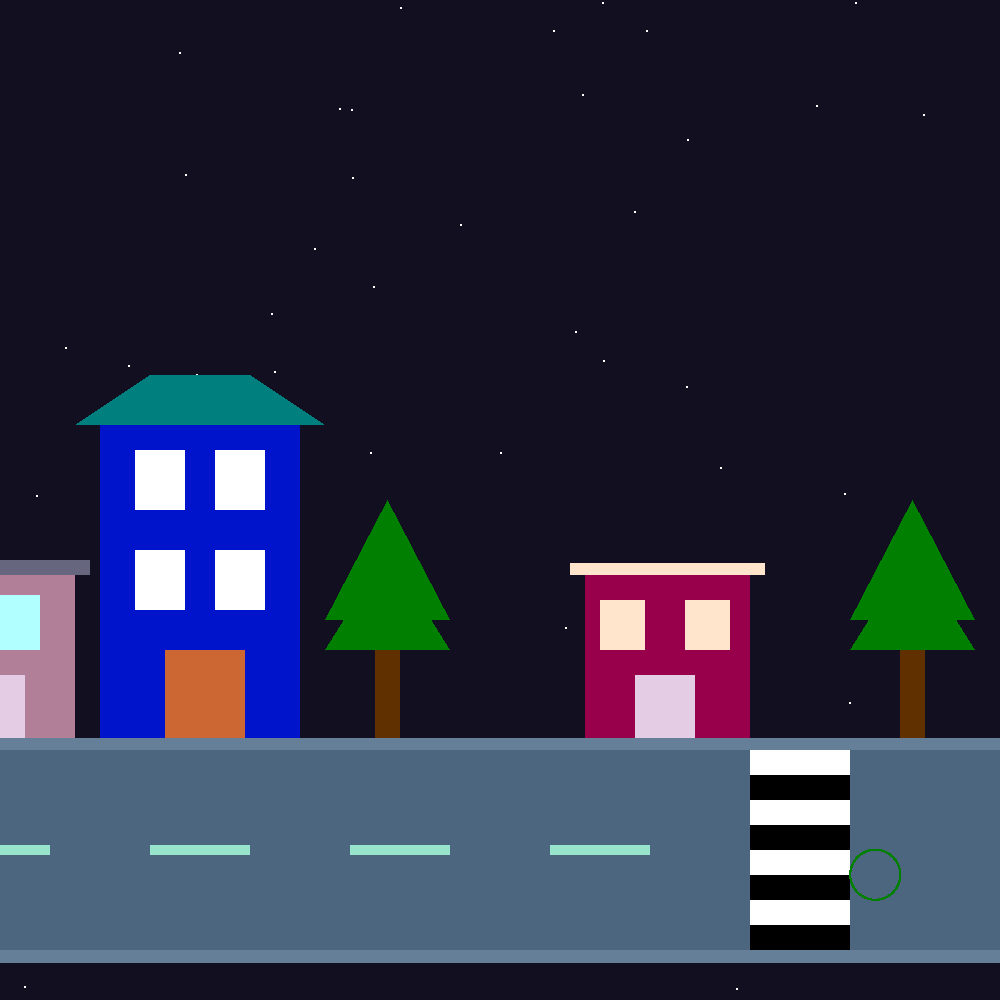

In [ ]:
import math
import random


def WritePixel(x, y, temp_x, temp_y):
    gl.glPointSize(2)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x + temp_x, y + temp_y)
    gl.glEnd()


def MidpointCircle(x, y, radius):
    d = 0.001 - radius
    temp_x = 0
    temp_y = radius
    Circlepoints(x, y, temp_x, temp_y)
    while (temp_x < temp_y):
        if d < 0:
            # E
            d = d + (2 * temp_x) + .003
            temp_x += .001
        else:
            # SE
            d = d + (2 * temp_x) - (2 * temp_y) + .005
            temp_x += .001
            temp_y -= .001
        Circlepoints(x, y, temp_x, temp_y)




def Circlepoints(x, y, temp_x, temp_y):
    WritePixel(x, y, temp_x, temp_y)
    WritePixel(x, y, temp_y, temp_x)
    WritePixel(x, y, temp_y, -temp_x)
    WritePixel(x, y, temp_x, -temp_y)
    WritePixel(x, y, -temp_x, -temp_y)
    WritePixel(x, y, -temp_y, -temp_x)
    WritePixel(x, y, -temp_y, temp_x)
    WritePixel(x, y, -temp_x, temp_y)



img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))